In [ ]:
# 1. IMPORTAR LAS LIBRERÍAS
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# 2. CARGAR LOS DATOS EN EL DATAFRAME

exams= pd.read_csv("https://raw.githubusercontent.com/Jeremias01/ProyectoFinalBigData/main/exams.csv")

In [ ]:
# Las 5 primeras filas
exams.head()

,id,gender,race/ethnicity,parental level of education,lunch,employed,test preparation course,math score,physics score,chemistry score,algebra_score
0,10-5894942,male,group A,high school,standard,yes,completed,67.0,67.0,63.0,66.0
1,41-1676468,female,group D,some high school,free/reduced,no,none,40.0,59.0,55.0,51.0
2,64-6396924,male,group E,some college,free/reduced,no,none,59.0,60.0,50.0,56.0
3,35-2426788,male,group B,high school,standard,yes,none,77.0,78.0,68.0,74.0
4,60-9387304,male,group E,associate's degree,standard,yes,completed,78.0,73.0,68.0,73.0


In [ ]:
# Las últimas 5 filas
exams.tail()

,id,gender,race/ethnicity,parental level of education,lunch,employed,test preparation course,math score,physics score,chemistry score,algebra_score
1013,82-7312119,male,group E,associate's degree,standard,yes,none,74.0,73.0,67.0,71.0
1014,45-3445439,male,group E,some college,free/reduced,no,none,78.0,84.0,77.0,80.0
1015,02-3651562,male,group A,some college,standard,no,completed,78.0,78.0,74.0,77.0
1016,05-5203587,female,group B,some college,standard,yes,none,75.0,76.0,81.0,77.0
1017,13-3347050,male,group D,some college,standard,no,completed,70.0,60.0,65.0,65.0


In [ ]:
# Resumen estadístico
#en el 7

In [ ]:
# 3. REVISAR LOS TIPOS DE DATOS
exams.dtypes

id                              object
gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
employed                        object
test preparation course         object
math score                     float64
physics score                  float64
chemistry score                float64
algebra_score                  float64
dtype: object

In [ ]:
# 4. ELIMINAR LOS DUPLICADOS
exams.drop_duplicates(inplace=True)

In [ ]:
# 5. ELIMINAR LAS COLUMNAS IRRELEVANTES
exams.drop(['id', 'race/ethnicity', 'lunch'], axis=1, inplace=True)

In [ ]:
# 6. RENOMBRAR LAS COLUMNAS
exams.rename(columns={'algebra_score':'algebra score',
                        'test preparation course':'preparation course'},
               inplace=True)

In [ ]:
# 7. ELIMINAR LOS VALORES PERDIDOS O NULOS
# Encontrar los valores nulos
print(exams.isnull().sum())
exams.dropna(inplace=True)
print("")
print(exams.describe())

gender                         0
parental level of education    0
employed                       0
preparation course             0
math score                     7
physics score                  7
chemistry score                7
algebra score                  7
dtype: int64

       math score  physics score  chemistry score  algebra score
count  993.000000     993.000000       993.000000     993.000000
mean    66.373615      68.992951        67.710977      67.692850
std     15.355347      14.714725        15.583996      14.476877
min     13.000000      27.000000        23.000000      22.000000
25%     56.000000      60.000000        58.000000      59.000000
50%     66.000000      70.000000        68.000000      67.000000
75%     77.000000      79.000000        79.000000      78.000000
max    100.000000     100.000000       100.000000     100.000000


In [ ]:
df_1 = _deepnote_execute_sql('SELECT * FROM exams', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_1

,gender,parental level of education,employed,preparation course,math score,physics score,chemistry score,algebra score
0,male,high school,yes,completed,67.0,67.0,63.0,66.0
1,female,some high school,no,none,40.0,59.0,55.0,51.0
2,male,some college,no,none,59.0,60.0,50.0,56.0
3,male,high school,yes,none,77.0,78.0,68.0,74.0
4,male,associate's degree,yes,completed,78.0,73.0,68.0,73.0
...,...,...,...,...,...,...,...,...
988,male,high school,yes,none,73.0,70.0,65.0,69.0
989,male,associate's degree,no,completed,85.0,91.0,92.0,89.0
990,female,some high school,yes,none,32.0,35.0,41.0,36.0
991,female,some college,yes,none,73.0,74.0,82.0,76.0


In [ ]:
# 8. DETECTAR LOS OUTLIERS
# partir de la hipotesis que se tiene un distribución Gaussiana
# obtener 2 nuevos dataset con outliers/no outlier 
# es normal la distribución?

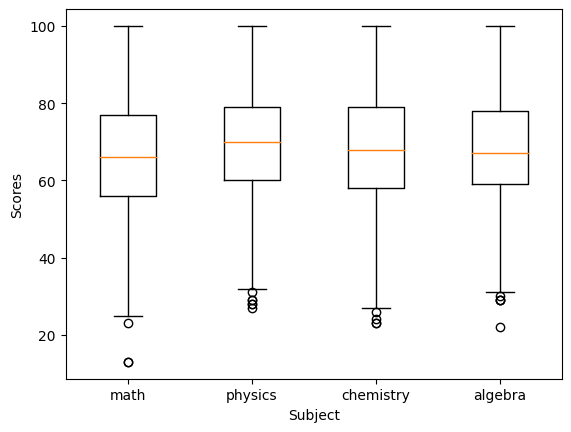

In [ ]:
plt.boxplot(x=[exams['math score'], exams['physics score'],
exams['chemistry score'], exams['algebra score']])
plt.xticks(ticks=[1,2,3,4], labels=['math', 'physics', 'chemistry', 'algebra'])
plt.xlabel("Subject")
plt.ylabel("Scores")
#matplot te exige que este pivoteada la tabla, seaborn te exige que no.
pass

In [ ]:
def outliers(subject):
    q1 = exams[subject].quantile(0.25)
    q3 = exams[subject].quantile(0.75)
    rango=q3-q1
    df_outliers =exams[(exams[subject]<q1-1.5*rango) | (exams[subject]>q3+1.5*rango)]
    return df_outliers[subject]
def normales(subject):
    q1 = exams[subject].quantile(0.25)
    q3 = exams[subject].quantile(0.75)
    rango=q3-q1
    df_normales = exams[(exams[subject]>=q1-1.5*rango) & (exams[subject]<=q3+1.5*rango)]
    return df_normales[subject]

outliers_math=outliers('math score')
normales_math=normales('math score')

outliers_physics=outliers('physics score')
normales_physics=normales('physics score')

outliers_chemistry=outliers('chemistry score')
normales_chemistry=normales('chemistry score')

outliers_algebra=outliers('algebra score')
normales_algebra=normales('algebra score')

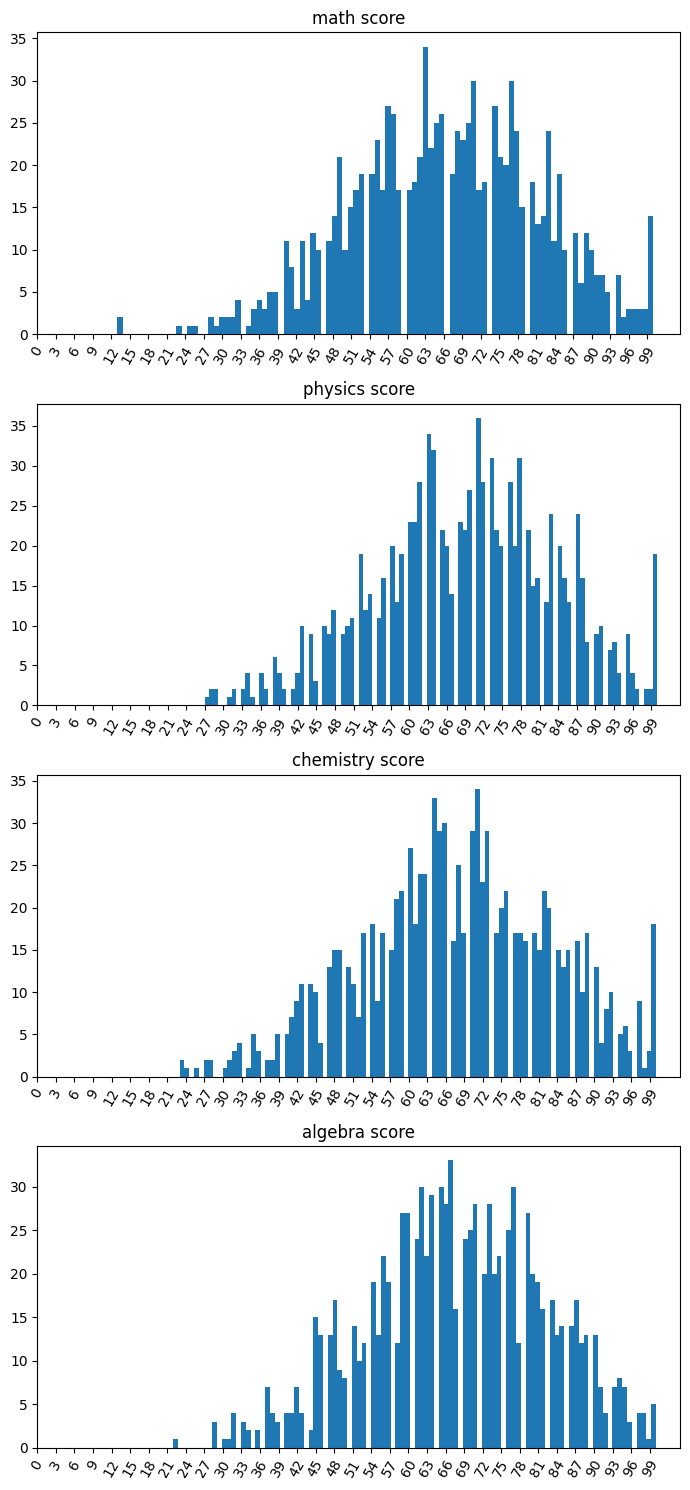

In [ ]:
fig,axs=plt.subplots(4, tight_layout=True, figsize=(7, 15))
def graphic(subject,num):
    fig1=axs[num].hist(x=exams[subject], bins=100)
    axs[num].set_title(subject)
    axs[num].set_xticks(np.arange(0,100,3))
    axs[num].set_xticklabels(np.arange(0,100,3),rotation=60)
    
graphic('math score',0)
graphic('physics score',1)
graphic('chemistry score',2)
graphic('algebra score',3)

pass

In [ ]:
df_corr=exams.copy()
df_corr.replace(to_replace=exams['gender'].unique(), value=[1,0], inplace=True)
df_corr.replace(to_replace=exams['employed'].unique(), value=[0,1], inplace=True)
df_corr.replace(to_replace=exams['parental level of education'].unique(), value=[1,0,2,3,4,5], inplace=True)
df_corr.replace(to_replace=exams['preparation course'].unique(), value=[1,0], inplace=True)

df_corr['average'] = exams.iloc[:,4:8].mean(axis = 1 )
#poner todo en ingles

In [ ]:
# 9. ENCONTRAR CORRELACIONES y FRECUENCIAS

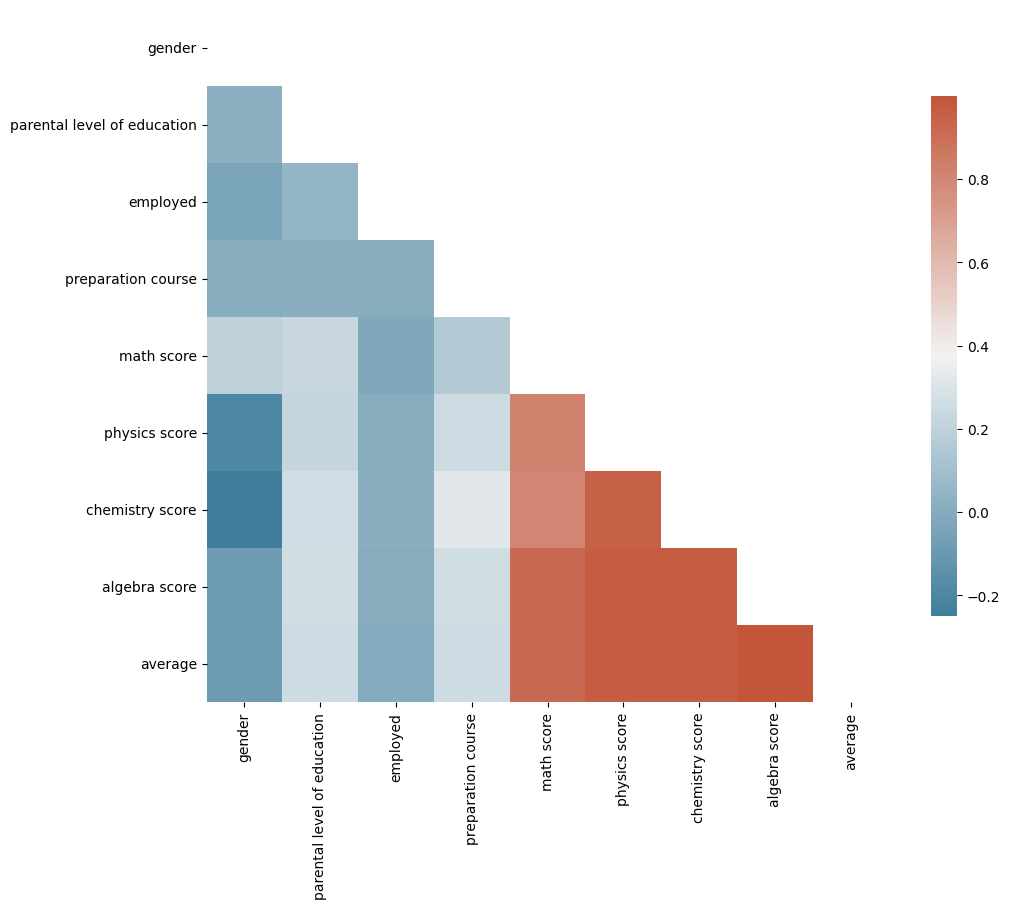

In [ ]:
corr = df_corr.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, cmap=cmap,cbar_kws={"shrink": .75})
pass

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=309126ce-ca6e-49d7-8640-2324af1a635e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>